Predicting wine quality: Here I use Recursive Feature Elimination method for Feature selection and Random search for searching method. In this model I do not use the nested cross validation(I use stratified cross validation)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
red_wine=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
print(red_wine.shape)

(1599, 12)


Add a feature regarding quality

In [33]:

red_wine["wine_quality"]=red_wine['quality'].apply(lambda x: 'low' if x <= 5 else 'medium' if x <=7
else 'high')
red_wine['wine_quality']= pd.Categorical(red_wine['wine_quality'], categories=['low','medium','high'])
red_wine=red_wine.drop_duplicates()
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,medium
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,medium
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low


As it is seen above most of features are right-skewed. I transform the data to log to bring the destribution of data closeer to normal.

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>],
       [<AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>],
       [<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

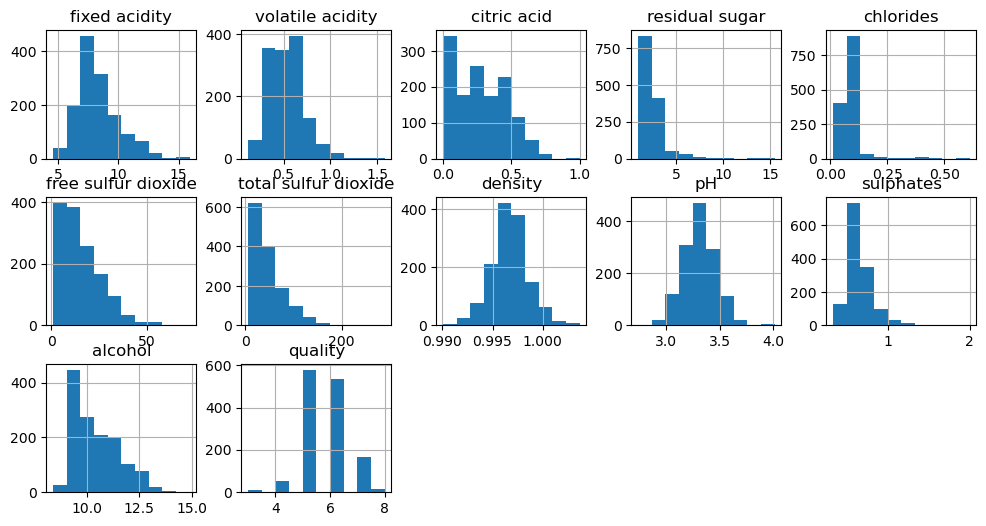

In [34]:
red_wine.hist(figsize=(12,6),layout=(3,5))

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>],
       [<AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>],
       [<AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

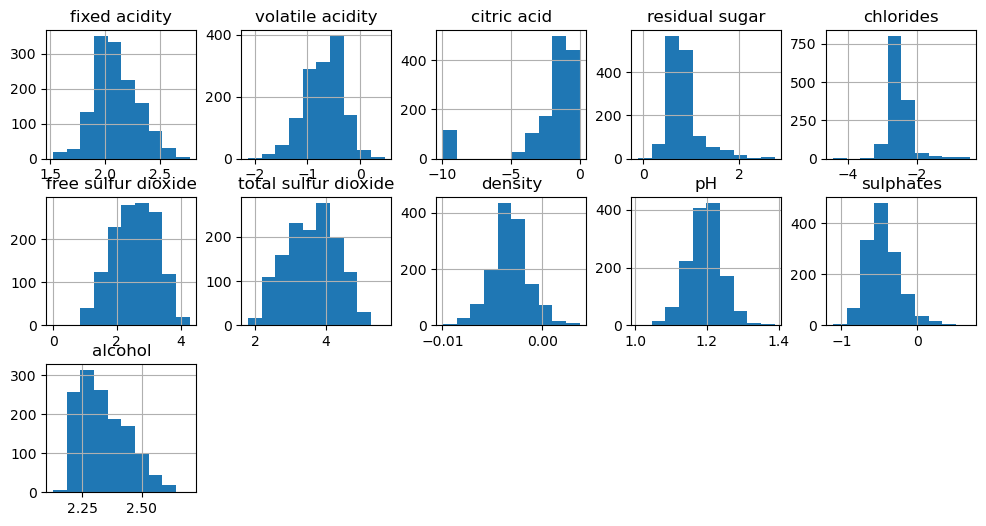

In [35]:
red_wine_t=np.log((red_wine[red_wine.columns[:-2]])+0.00005)
red_wine_t["wine_quality"]=red_wine["wine_quality"]
red_wine_t.hist(figsize=(12,6),layout=(3,5))

Plot pie chart to see the number of different wine qualities

([<matplotlib.patches.Wedge at 0x7f9b6f2b2490>,
 [Text(-0.05718854349591392, 1.0985123897766544, 'low'),
  Text(0.013985176224340375, -1.0999110940644132, 'medium'),
  Text(1.0991506836631655, -0.04321775795660954, 'high')],
 [Text(-0.031193750997771226, 0.5991885762418114, '51.66'),
  Text(0.007628277940549294, -0.5999515058533162, '47.09'),
  Text(0.5995367365435448, -0.02357332252178702, '1.25')])

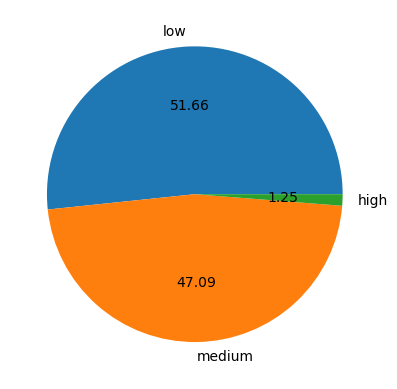

In [36]:
plt.pie(red_wine_t['wine_quality'].value_counts(), labels=red_wine_t['wine_quality'].unique(), autopct='%.2f')

Encoding

In [37]:
red_wine_t['wine_quality']=np.where(red_wine_t['wine_quality']=='high', 2,red_wine_t['wine_quality'] )
red_wine_t['wine_quality']=np.where(red_wine_t['wine_quality']=='medium', 1,red_wine_t['wine_quality'] )
red_wine_t['wine_quality']=np.where(red_wine_t['wine_quality']=='low', 0,red_wine_t['wine_quality'] )
red_wine_t['wine_quality']=red_wine_t['wine_quality'].astype('int32')
red_wine_t['wine_quality'].value_counts()

1    702
0    640
2     17
Name: wine_quality, dtype: int64

Split data

In [38]:
from sklearn.model_selection import train_test_split
x, y=red_wine_t[red_wine_t.columns[:-2]], red_wine_t[red_wine_t.columns[-1]]
x=np.array(x)
y=np.array(y)
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.3,shuffle=True, random_state=42,stratify=y) 

Create pipelines to use in nested cross validation

In [39]:
from sklearn.ensemble import  RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier as Xgb
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier as LighGB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import matthews_corrcoef, f1_score, confusion_matrix, make_scorer, balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve

# initiakising classifiers

m1 = LogisticRegression(multi_class='multinomial',
                          solver='newton-cg',
                          random_state=1)
m2 = AdaBoostClassifier(random_state=1)
m3 = DecisionTreeClassifier(random_state=1)
m4 = LighGB(random_state=1)
m5 = RandomForestClassifier(random_state=1)

# Building the pipelines
pipe1 = Pipeline([('rfe', RFE(estimator=m1)),
                  ('m1', m1)])

pipe2 = Pipeline([('rfe', RFE(estimator=m2)),
                  ('m2', m2)])
                
pipe3=Pipeline([('rfe', RFE(estimator=m3)),
                  ('m3', m3)])

pipe4 = Pipeline([('rfe', RFE(estimator=m4)),
                  ('m4', m4)])
pipe5 = Pipeline([('rfe', RFE(estimator=m5)),
                  ('m5', m5)])


# Setting up the parameter grids
par1 = [ {"rfe__n_features_to_select": [4,6,8,10], 'm1__penalty': ['l2']
                ,'m1__C': np.power(10., np.arange(-4, 4))}]

par2 = [{"rfe__n_features_to_select": [4,6,8,10],"m2__n_estimators":[50,100,200,400,600], 
"m2__learning_rate": [0.001,0.01,0.1,0.2]}]

par3 = [{ "rfe__n_features_to_select": [4,6,8,10], "m3__criterion": ["gini", "entropy"],
"m3__splitter": ["best", "random"], "m3__max_depth": [None, 5,7,12,20]}]  

par4 = [{"rfe__n_features_to_select": [4,5,6,7,8,9], 
"m4__max_depth": [-1,5,8], "m4__n_estimators": [100,300,500,30,700],
"m4__learning_rate": [1,2,4], "m4__subsample_for_bin":[500,1000,10000,200000]}]

par5 = [{"rfe__n_features_to_select": [4,6,8,10],  "m5__max_depth": [None,5,8,12,20],
              "m5__n_estimators" :[100,300,50,400,600],
              "m5__criterion": ["gini","entropy"],
              "m5__min_samples_split": [2,4,6],"m5__min_samples_leaf": [1,2,4,5]}]



Creat inner CV

In [40]:
pipe=[pipe1,pipe2,pipe3,pipe4,pipe5]
par_grid=[par1,par2,par3,par4,par5]
gcv_all=[]
f1 = make_scorer(f1_score , average='macro')

inner_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)
for i in range(len(pipe)):
    gcv = RandomizedSearchCV(estimator=pipe[i],
                        param_distributions=par_grid[i],
                        scoring='balanced_accuracy',
                        n_jobs=-1,
                        n_iter=30,
                        cv=inner_cv,
                        verbose=0,
                        refit=True)
    gcv_all.append(gcv)


Function for ploting learning curves

In [41]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring= "balanced_accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Out CV + plotting learning curves 

Best Score: 0.45232115203805096
Best Hyperparameters: {'rfe__n_features_to_select': 8, 'm1__penalty': 'l2', 'm1__C': 1000.0}
Best prediction score: 0.708076923076923
confusion Matrix [[139  61   0]
 [ 53 150   5]
 [  0   0   0]]


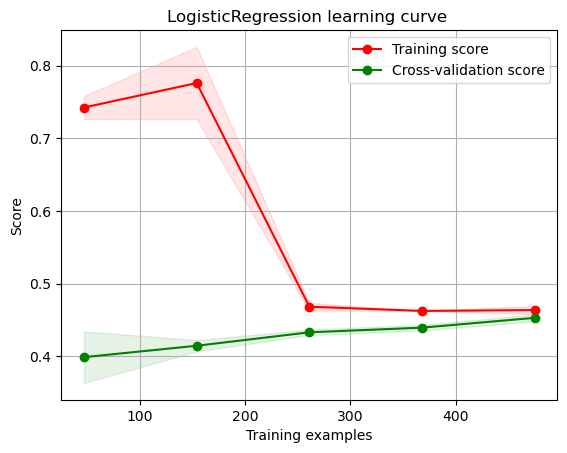

Best Score: 0.44173441734417346
Best Hyperparameters: {'rfe__n_features_to_select': 8, 'm2__n_estimators': 600, 'm2__learning_rate': 0.1}
Best prediction score: 0.5486111111111112
confusion Matrix [[155  85   0]
 [ 37 123   4]
 [  0   3   1]]


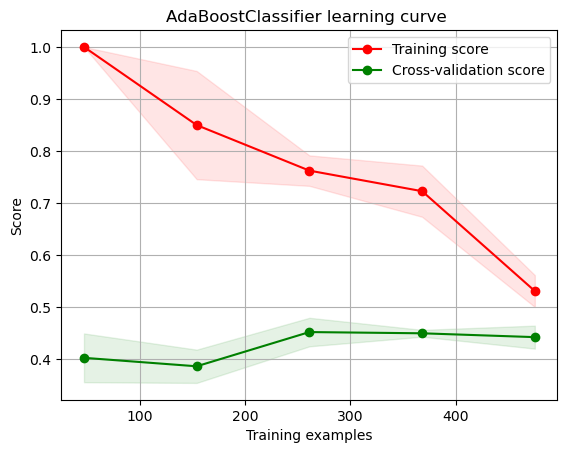

Best Score: 0.4832584964880261
Best Hyperparameters: {'rfe__n_features_to_select': 10, 'm3__splitter': 'best', 'm3__max_depth': 12, 'm3__criterion': 'gini'}
Best prediction score: 0.4347154471544716
confusion Matrix [[130  75   0]
 [ 61 134   5]
 [  1   2   0]]


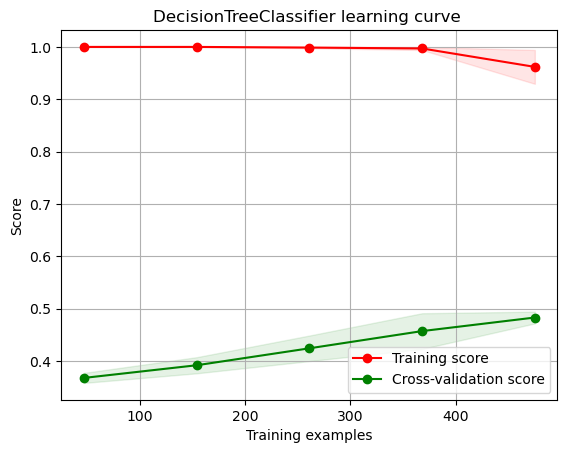

Best Score: 0.47023619407112444
Best Hyperparameters: {'rfe__n_features_to_select': 4, 'm4__subsample_for_bin': 500, 'm4__n_estimators': 500, 'm4__max_depth': 8, 'm4__learning_rate': 1}
Best prediction score: 0.4323681279740812
confusion Matrix [[110  56   0]
 [ 82 151   5]
 [  0   4   0]]


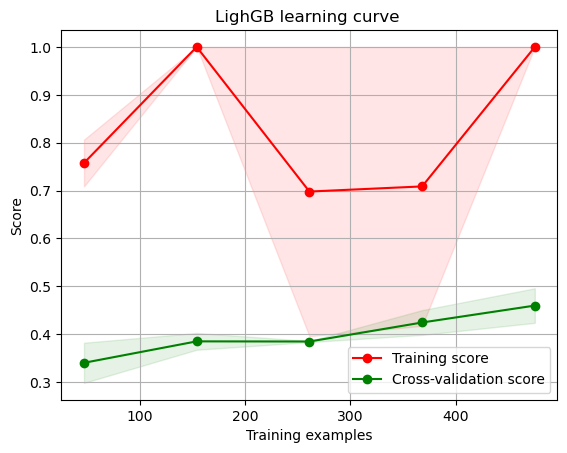

Best Score: 0.4787446075991373
Best Hyperparameters: {'rfe__n_features_to_select': 10, 'm5__n_estimators': 300, 'm5__min_samples_split': 4, 'm5__min_samples_leaf': 5, 'm5__max_depth': 12, 'm5__criterion': 'entropy'}
Best prediction score: 0.7349820771284914
confusion Matrix [[143  54   0]
 [ 49 157   5]
 [  0   0   0]]


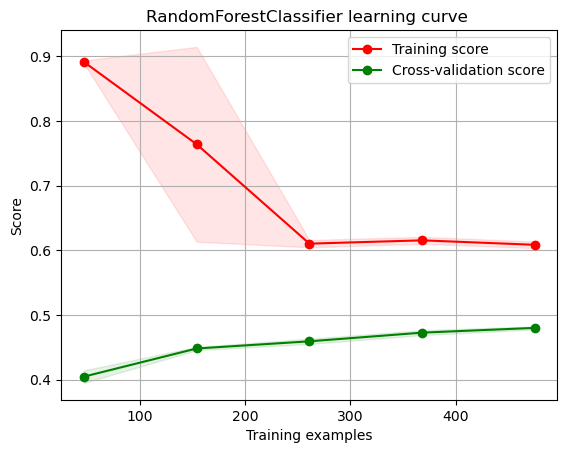

In [42]:
import warnings
warnings.simplefilter('ignore')
final_scores = []
final_mean_score=[]
final_std_score=[]
name=['LogisticRegression', 'AdaBoostClassifier','DecisionTreeClassifier'
,'LighGB', 'RandomForestClassifier'] 
count=0   
for gcv_out in gcv_all: 
    result = gcv_out.fit(X_train, y_train)
# summarize result
    print('Best Score: %s' % result.best_score_)
    final_scores.append(result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_) 
    print('Best prediction score: %s' % balanced_accuracy_score(result.best_estimator_.predict(X_test),y_test))
    print('confusion Matrix', confusion_matrix(result.best_estimator_.predict(X_test),y_test))
    plot_learning_curve(estimator = gcv_out.best_estimator_,title = "{} learning curve ".format(name[count]),
                    X = X_train, y = y_train, cv = inner_cv)
    plt.show()

    count+=1




Comparing scores of different models

In [43]:
def con(y_test,pred_rfc):
    labels = np.unique(y_test)
    a = confusion_matrix(y_test, pred_rfc)
    a = pd.DataFrame(a, index=("low", "medium","high"), columns=("low", "Rmedium","high"))
    display(a)

In [50]:
from sklearn.metrics import balanced_accuracy_score
gcv_model_select = RandomizedSearchCV(estimator=pipe2,
                                param_distributions=par2,
                                scoring='balanced_accuracy',
                                n_jobs=-1,
                                cv=inner_cv,
                                verbose=1,
                                n_iter=30,
                                refit=True)


gcv_model_select.fit(X_train, y_train) # run inner loop hyperparam tuning
   

m=gcv_model_select.best_estimator_.fit(X_train, y_train)
m=gcv_model_select.best_estimator_.fit(X_train, y_train)
print('Best CV accuracy: %.2f%%' % (gcv_model_select.best_score_*100))
print('Best parameters:', gcv_model_select.best_params_)
print('test accuracy: %.2f%%' % (balanced_accuracy_score(y_test, m.predict(X_test))*100))
print('train accuracy: %.2f%%' % (balanced_accuracy_score(y_train, m.predict(X_train))*100))
con(m.predict(X_test),y_test)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
Best CV accuracy: 44.17%
Best parameters: {'rfe__n_features_to_select': 8, 'm2__n_estimators': 600, 'm2__learning_rate': 0.1}
test accuracy: 53.01%
train accuracy: 51.00%


,low,Rmedium,high
low,155,85,0
medium,37,123,4
high,0,3,1


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, m.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72       192
           1       0.75      0.58      0.66       211
           2       0.25      0.20      0.22         5

    accuracy                           0.68       408
   macro avg       0.55      0.53      0.53       408
weighted avg       0.69      0.68      0.68       408



In [46]:
from sklearn.metrics import balanced_accuracy_score
print("Balaced accuracy is : %.2f%%" %(balanced_accuracy_score(y_test, m.
predict(X_test))*100))

Balaced accuracy is : 38.17%
